<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [32]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

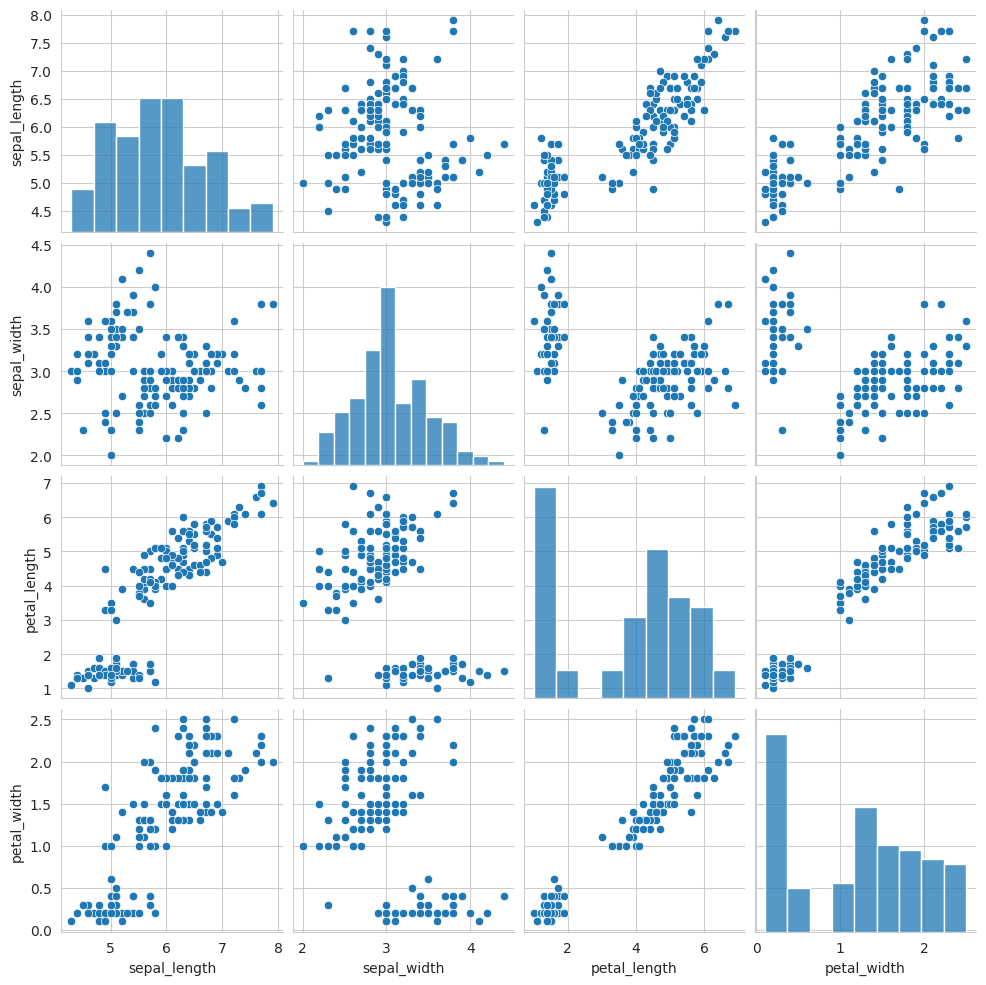

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris)

**Comentário:** A base de dados "Iris" possui 4 informações sobre plantas. Comprimento da sépala,
largura da sépala,
comprimento da pétala,
largura da pétala. Na visualização desses dados temos 16 gráficos, onde cada uma das 4 informações das plantas são comparadas entre elas.



## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [17]:
#verificando se existem valores nulos da base

print(iris.isna().sum())
print('------------------------------------------------------')
iris.info()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [11]:
#verificando os tipos de dados
iris.dtypes
#como pode-se obeservar, todos valores da base são números, não existe a necessidade de tratá-los

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [ ]:
# resposta da questão 2.3
#Não houve a necessidade de escalar as variáveis

## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [23]:
#treinando o modelo
model = KMeans(n_clusters=10, n_init=10)
model = model.fit(iris)

In [25]:
model.__dict__

{'n_clusters': 10,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 '_tol': 0.00011356176666666667,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[5.62272727, 2.70909091, 4.11818182, 1.28636364],
        [4.67894737, 3.08421053, 1.37894737, 0.2       ],
        [6.56818182, 3.08636364, 5.53636364, 2.16363636],
        [7.71666667, 3.16666667, 6.56666667, 2.15      ],
        [5.5125    , 4.        , 1.475     , 0.275     ],
        [6.03684211, 2.70526316, 5.        , 1.77894737],
        [7.23333333, 3.08333333, 6.03333333, 1.95      ],
        [5.2       , 2.36666667, 3.38333333, 1.01666667],
        [5.1       , 3.51304348, 1.52608696, 0.27391304],
        [6.44210526, 2.97894737, 4.59473684, 1.43157895]]),
 '_

In [43]:
#criando a lista

lista_wcss = []
for num_clusters in range(1,11):
  modelo = KMeans(n_clusters=num_clusters, n_init=10)
  modelo.fit(iris)
  lista_wcss.append(modelo.inertia_)
print(lista_wcss)


[681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.446182051282065, 39.03998724608726, 34.29822966507178, 29.988943950786055, 28.17099583517618, 26.017114540516243]


### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

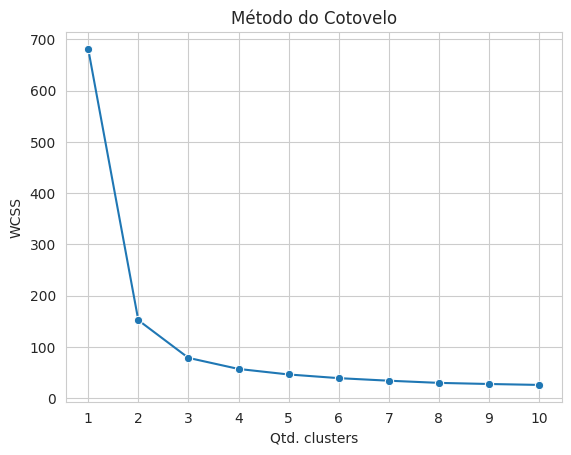

In [34]:
# resposta da questão 3.2
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(x=range(1, 11), y=lista_wcss, marker="o")
    grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters')
    grafico.set_xticks(range(1, 11))
    plt.show()

**Comentário:** Após analisar o "Método do Cotovelo", no gráfico de linhas, observei que o o ideal seria utilizar 4 cluster.

In [50]:
#treinando o modelo com a quantidade de clusters definida

model = KMeans(n_clusters=4, n_init=10)
model = model.fit(iris)



In [51]:
model.__dict__

{'n_clusters': 4,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 '_tol': 0.00011356176666666667,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.9125    , 3.1       , 5.846875  , 2.13125   ],
        [6.2525    , 2.855     , 4.815     , 1.625     ]]),
 '_n_features_out': 4,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
        0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
        0, 0, 0, 3, 0,

In [54]:
#criando um data frame com os "clusters"
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
display(clusters)

,cluster
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,3
147,3
148,2


### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [57]:
#adicionando o cluester na base

iris_clusterizado = pd.concat([iris, clusters], axis=1)
iris_clusterizado.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

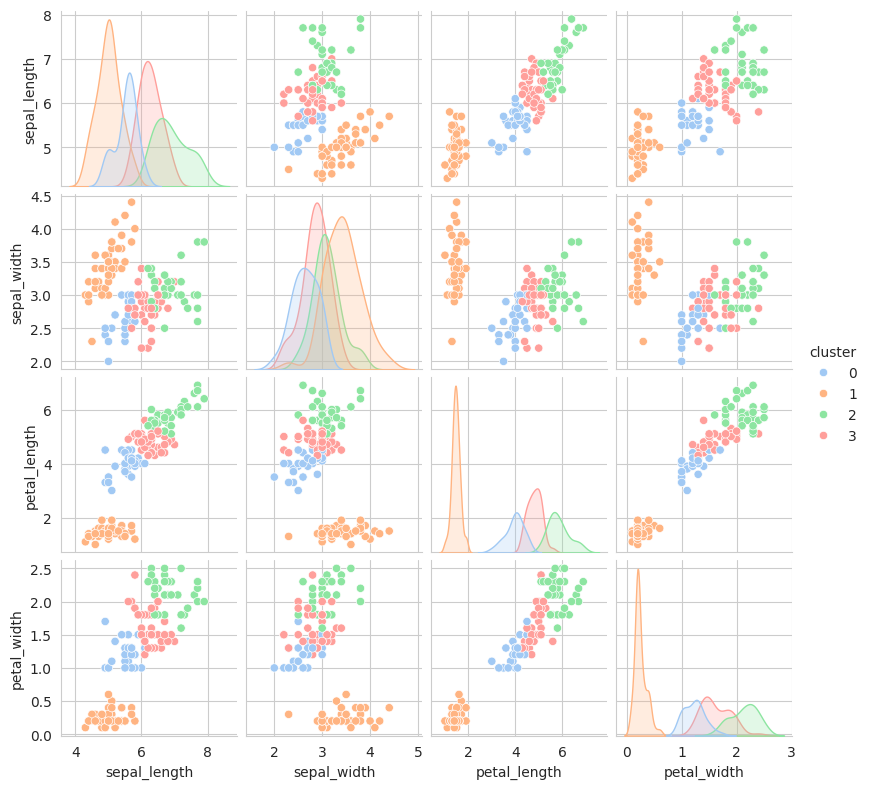

In [61]:
# resposta da questão 3.3.b
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris_clusterizado, hue='cluster', palette="pastel", height=2)

**Comentário:** A "clusterização" das medidas das plantas foi realizada em 4 "cluster".

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [66]:
#informando as medidas da nova flor
nova_flor = np.array([5.1, 3.5, 1.4, 0.2])

#relizando a previsão dessa planta
cluster = model.predict(nova_flor.reshape(1, -1))
print(f'o cluster da nova planta é: {cluster[0]}')

o cluster da nova planta é: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---